<a href="https://colab.research.google.com/github/urban-malaria/CitizenScience/blob/main/Women_Malaria_Dataset_Wet_Season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Questionnaire Link](https://www.dropbox.com/scl/fi/fkvb8lty8b3g4e9xvmlsn/SECTION-4_Questionnaire.docx?rlkey=cudw0lrp23ggd3upf42xn6ojm&st=s1lj53tg&dl=0
) for more details

In [1]:
!pip install sodapy

In [2]:
import pandas as pd
from sodapy import Socrata

In [3]:
Wlink= "https://www.dropbox.com/scl/fi/8mn51wqvlh8g4rosmxh4b/womendata_HSB.csv?rlkey=fef6suy4473idaum5vb0f0l3o&st=cg5b4fyp&dl=1"
working_df= pd.read_csv(Wlink)
working_df.head()

,sn,redcap_repeat_instrument,redcap_repeat_instance,Nothing,Self-medicated with drugs at home,Sought advice/treatment,Others,q405b,q406,q406i,...,q416,q417,q417i,q418,q419,q420,q421,section_4a_history_o_v_0,city,Treat_Option
0,0001,section_4a_history_of_malaria_infection,1,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Kano,NaN
1,001,section_4a_history_of_malaria_infection,1,0,1,0,0,NaN,NaN,NaN,...,2.0,NaN,NaN,3.0,0.0,2.0,1.0,2,Kano,NaN
2,01,section_4a_history_of_malaria_infection,1,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2,Kano,NaN
3,1/354,section_4a_history_of_malaria_infection,1,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Kano,NaN
4,002,section_4a_history_of_malaria_infection,1,0,1,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Kano,NaN


In [4]:
working_df.shape

(6494, 51)

In [5]:
print(working_df.isnull().sum())

sn                                      0
redcap_repeat_instrument                0
redcap_repeat_instance                  0
Nothing                                 0
Self-medicated with drugs at home       0
Sought advice/treatment                 0
Others                                  0
q405b                                6457
q406                                 6398
q406i                                6491
q406ii                               6491
q406iii                              6489
q407                                 6396
q408                                 6396
q409                                 6467
q409i                                6491
q409ii                               6491
q409iii                              6491
q410                                 6396
q411a                                6443
q411b                                6447
q412                                 5672
q413                                 5671
q414                              

In [6]:
city = 'kano'

# Ensure the city column is of string type
working_df['city'] = working_df['city'].astype(str)

# Filter the DataFrame for the specified city
working_df = working_df[working_df['city'].str.lower() == city.lower()]

# Display the filtered DataFrame
print(working_df.head())

      sn                 redcap_repeat_instrument  redcap_repeat_instance  \
0   0001  section_4a_history_of_malaria_infection                       1   
1    001  section_4a_history_of_malaria_infection                       1   
2     01  section_4a_history_of_malaria_infection                       1   
3  1/354  section_4a_history_of_malaria_infection                       1   
4    002  section_4a_history_of_malaria_infection                       1   

   Nothing  Self-medicated with drugs at home  Sought advice/treatment  \
0        0                                  0                        0   
1        0                                  1                        0   
2        0                                  0                        0   
3        0                                  0                        0   
4        0                                  1                        0   

   Others q405b  q406 q406i  ... q416 q417 q417i  q418  q419 q420 q421  \
0       0   NaN   

In [7]:
# Create a list of columns to be removed, starting with q405b as they are mostly either empty or irrelevent to current research
remove_columns= [col for col in working_df.columns if col.startswith(('q406i','q407', 'q412','q413','q414','q415','q416','q417','q418','q419','q420','q421' ))]
# Add additional columns to the list: treatement and history
remove_columns+= ['Treat_Option','redcap_repeat_instrument', 'redcap_repeat_instance']
# Drop the specified columns from the DataFrame to streamline the dataset
working_df = working_df.drop(columns=remove_columns)

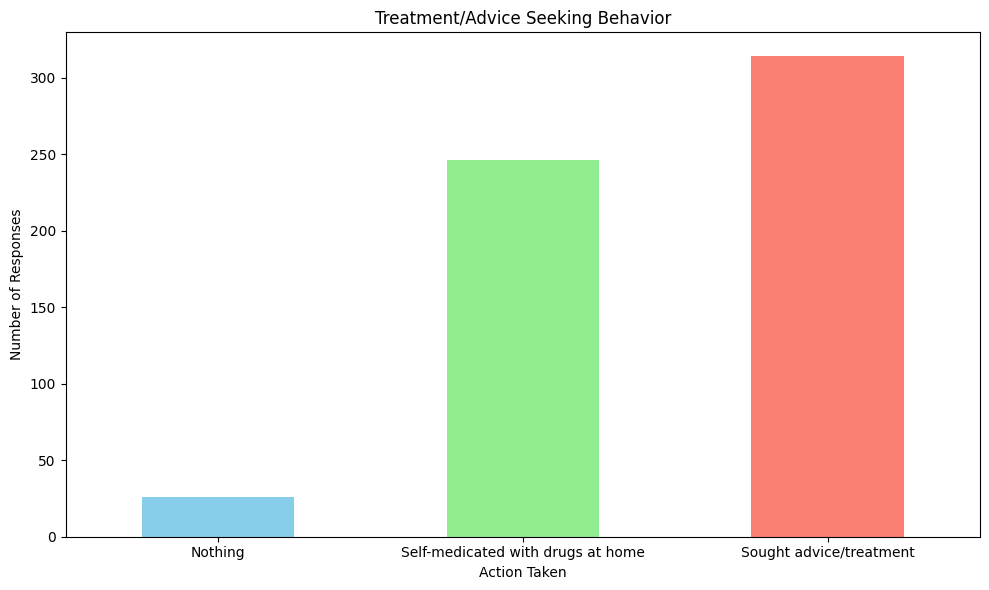

In [8]:
import matplotlib.pyplot as plt
# Count the occurrences of 1 in each column
nothing_count = working_df['Nothing'].sum()
self_medicated_count = working_df['Self-medicated with drugs at home'].sum()
sought_advice_count = working_df['Sought advice/treatment'].sum()

# Create a dictionary to hold the counts
counts = {
    'Nothing': nothing_count,
    'Self-medicated with drugs at home': self_medicated_count,
    'Sought advice/treatment': sought_advice_count
}

# Convert the counts dictionary to a Series for easy plotting
counts_series = pd.Series(counts)

# Plot a bar chart
plt.figure(figsize=(10, 6))
counts_series.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Treatment/Advice Seeking Behavior')
plt.xlabel('Action Taken')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the graph
plt.show()

In [9]:
print(working_df.isnull().sum())

sn                                      0
Nothing                                 0
Self-medicated with drugs at home       0
Sought advice/treatment                 0
Others                                  0
q405b                                4026
q406                                 3969
q408                                 3969
q409                                 4028
q409i                                4049
q409ii                               4049
q409iii                              4049
q410                                 3969
q411a                                4007
q411b                                4011
section_4a_history_o_v_0                0
city                                    0
dtype: int64


# **Question 406**
For question 406, we see that we 6398 null data after checking the csv data manually as well, I can confirm that this seems correct, which means that out of the 6494, we should expect to see around 96 responses total.

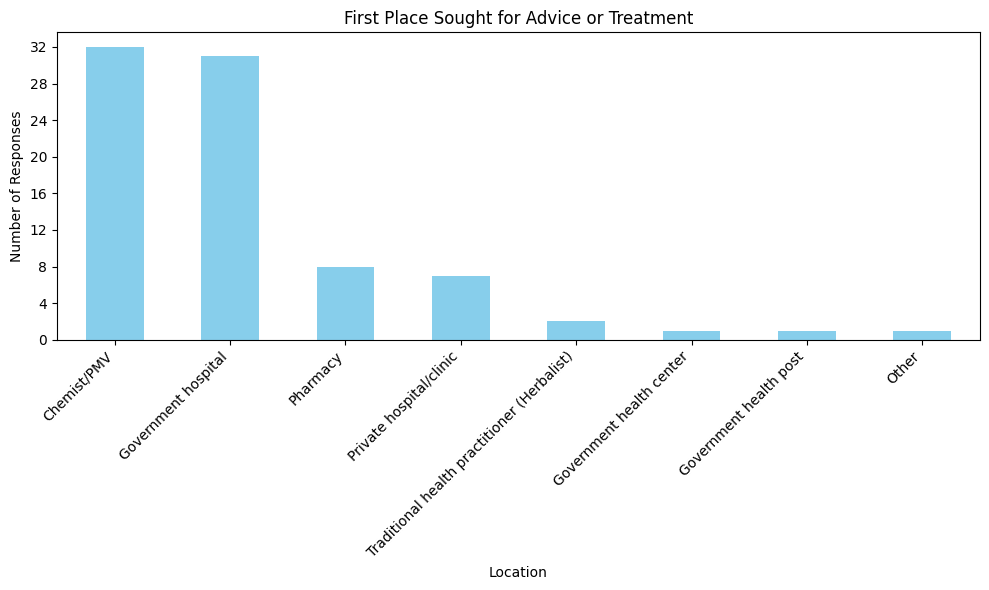

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Mapping for q406 values to names
q406_mapping = {
    1: 'Government hospital',
    2: 'Government health center',
    3: 'Government health post',
    4: 'Mobile clinic',
    5: 'Fieldworker/CHW',
    6: 'Other public sector',
    7: 'Private hospital/clinic',
    8: 'Pharmacy',
    9: 'Chemist/PMV',
    10: 'Private doctor',
    11: 'Mobile clinic',
    12: 'Private Laboratory',
    13: 'Other private medical sector',
    14: 'Shop',
    15: 'Traditional health practitioner (Herbalist)',
    16: 'Market',
    17: 'Drug peddler',
    18: 'Community-oriented resource person',
    19: 'Visited family friend/friend that is a health professional',
    20: 'Consulted a Spiritual Leader',
    21: 'Other'
}

# Replace the numerical values in q406 with their corresponding names
working_df['q406'] = working_df['q406'].map(q406_mapping)

# Count the occurrences of each value in q406
q406_counts = working_df['q406'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = q406_counts.plot(kind='bar', color='skyblue')
plt.title('First Place Sought for Advice or Treatment')
plt.xlabel('Location')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha='right')

# Set the y-axis to show only whole numbers
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

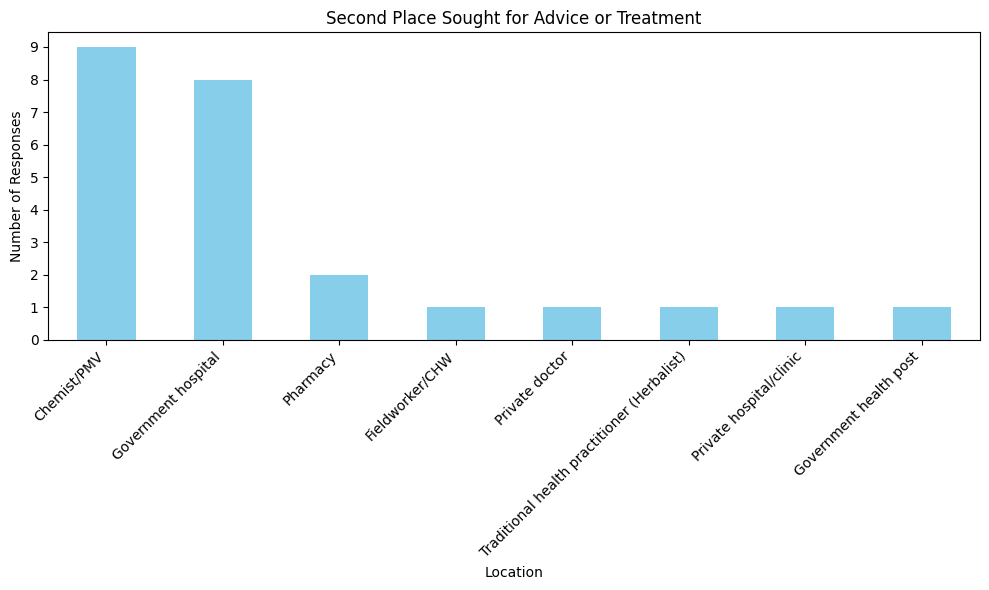

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Mapping for q409 values to names
q409_mapping = {
    1: 'Government hospital',
    2: 'Government health center',
    3: 'Government health post',
    4: 'Mobile clinic',
    5: 'Fieldworker/CHW',
    6: 'Other public sector',
    7: 'Private hospital/clinic',
    8: 'Pharmacy',
    9: 'Chemist/PMV',
    10: 'Private doctor',
    11: 'Mobile clinic',
    12: 'Private Laboratory',
    13: 'Other private medical sector',
    14: 'Shop',
    15: 'Traditional health practitioner (Herbalist)',
    16: 'Market',
    17: 'Drug peddler',
    18: 'Community-oriented resource person',
    19: 'Visited family friend/friend that is a health professional',
    20: 'Consulted a Spiritual Leader',
    21: 'Other'
}

# Replace the numerical values in q406 with their corresponding names
working_df['q409'] = working_df['q409'].map(q406_mapping)

# Count the occurrences of each value in q406
q409_counts = working_df['q409'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = q409_counts.plot(kind='bar', color='skyblue')
plt.title('Second Place Sought for Advice or Treatment')
plt.xlabel('Location')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha='right')

# Set the y-axis to show only whole numbers
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

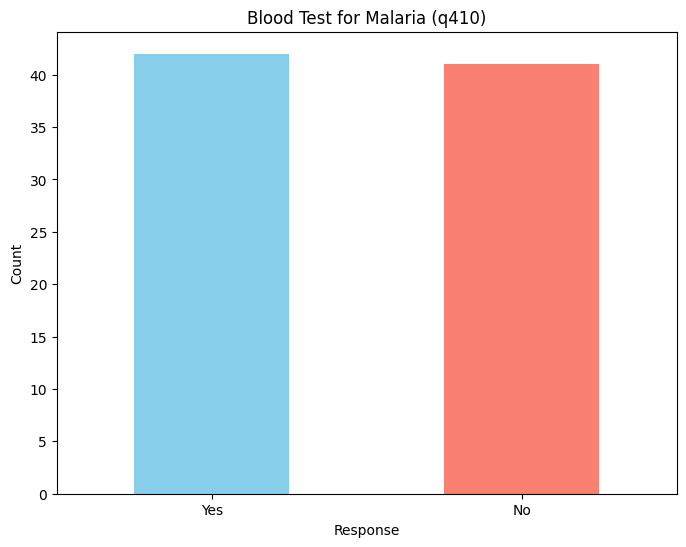

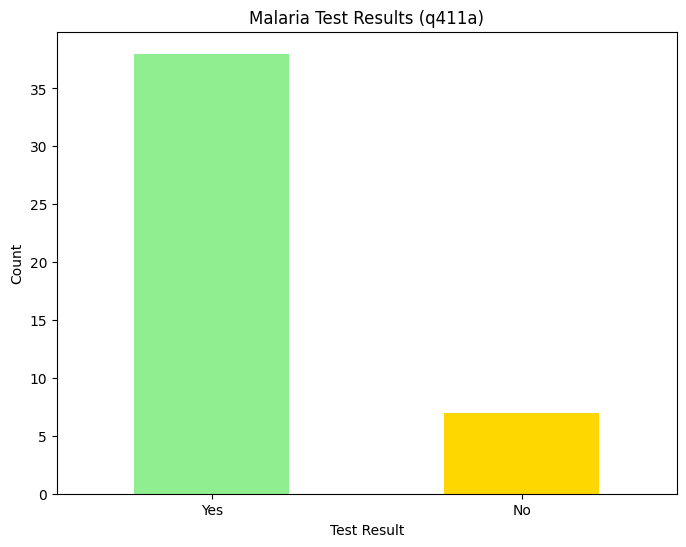

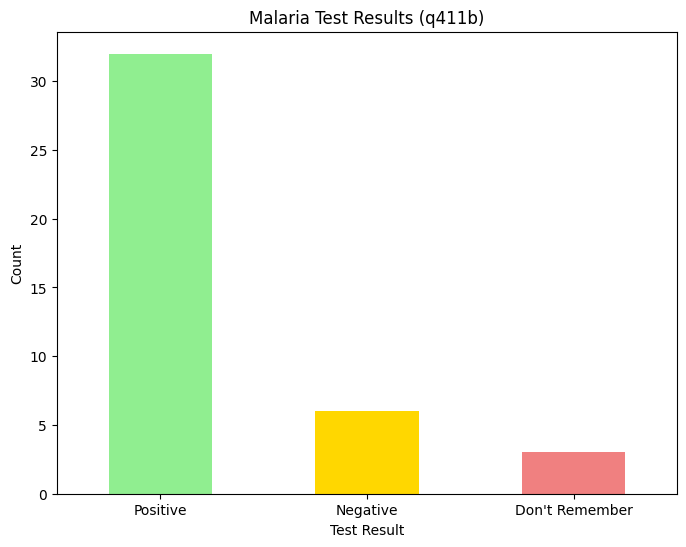

In [12]:
import matplotlib.pyplot as plt

# Q410: Blood test for malaria
q410_counts = working_df['q410'].value_counts()

# Plotting Q410
plt.figure(figsize=(8, 6))
q410_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Blood Test for Malaria (q410)')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'], rotation=0)
plt.show()

# Q411: Test result
q411a_counts = working_df['q411a'].value_counts()

# Plotting Q411
plt.figure(figsize=(8, 6))
q411a_counts.plot(kind='bar', color=['lightgreen', 'gold', 'lightcoral'])
plt.title('Malaria Test Results (q411a)')
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Yes','No'], rotation=0)
plt.show()

# Q411b: Malaria diagnosis by a healthcare provider
q411b_counts = working_df['q411b'].value_counts()

# Plotting Q411b
plt.figure(figsize=(8, 6))
q411b_counts.plot(kind='bar', color=['lightgreen', 'gold', 'lightcoral'])
plt.title('Malaria Test Results (q411b)')
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Positive', 'Negative', 'Don\'t Remember'], rotation=0)
plt.show()